In [6]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

from pca import PCA
from linear_classifier import LinearClassifier

In [7]:
def load_data(train_path_images, train_path_labels, test_path_images, test_path_labels):
    X_train = idx2numpy.convert_from_file(train_path_images)
    Y_train = idx2numpy.convert_from_file(train_path_labels)

    X_test = idx2numpy.convert_from_file(test_path_images)
    Y_test = idx2numpy.convert_from_file(test_path_labels)

    # Convertendo os rótulos para inteiros
    y_train = Y_train.astype(int)
    y_test = Y_test.astype(int)

    return X_train, y_train, X_test, y_test

def save_image_information(x, y):
    reference_images = {
        '0': None,
        '1': None,
        '2': None,
        '3': None,
        '4': None,
        '5': None,
        '6': None,
        '7': None,
        '8': None,
        '9': None,
    }
    for image, label in zip(x, y):
        if label == 0:
            reference_images[str(label)] = image
        if label == 1:
            reference_images[str(label)] = image
        if label == 2:
            reference_images[str(label)] = image
        if label == 3:
            reference_images[str(label)] = image
        if label == 4:
            reference_images[str(label)] = image
        if label == 5:
            reference_images[str(label)] = image
        if label == 6:
            reference_images[str(label)] = image
        if label == 7:
            reference_images[str(label)] = image
        if label == 8:
            reference_images[str(label)] = image
        if label == 9:
            reference_images[str(label)] = image

    return reference_images
    

In [8]:
def main():
    # Variaveis
    epochs = 100
    pca_apply = True
    pca_percentage_var = 0.95
    learning_rate = 0.95
    
    # Carregando a base MNIST
    train_path_images = 'dataset/train/train-images.idx3-ubyte'
    train_path_labels = 'dataset/train/train-labels.idx1-ubyte'

    test_path_images = 'dataset/test/t10k-images.idx3-ubyte'
    test_path_labels = 'dataset/test/t10k-labels.idx1-ubyte'
    
    X_train, Y_train, X_test, Y_test = load_data(train_path_images, train_path_labels, test_path_images, test_path_labels)
    
    reference_images = save_image_information(X_train, Y_train)
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # normalização dos dados
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    # Treinamento do Perceptron Logístico
    num_classes = len(np.unique(Y_train))
    
    if pca_apply:
        # aplicando PCA aos dados de entrada
        pca = PCA(percentage_var=pca_percentage_var)
        X_train = pca.pca(X_train)
        X_test = pca.transform(X_test)
    
    print(X_train.shape)
    # carregando os modelos
    linear_classifier_model = LinearClassifier()

    # --------------------- Classificador Linear --------------------- #
    linear_classifier_model.fit(X_train, Y_train, num_classes)
    
    # Classificação dos dados de teste
    predictions = linear_classifier_model.predict(X_test)

    # Avaliação do desempenho do modelo
    accuracy = np.mean(predictions == Y_test)
    print(f'[INFO] - Acurácia do Classificador Linear de Minimos Quadrados: {accuracy:.4f}')
    print(f'[INFO] - Taxa de erro: {1 - accuracy:.4f}')
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i, ax in enumerate(axes.flat):
        digit = str(i)
        img = reference_images[digit]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        # Configurar a label embaixo da imagem
        ax.text(0.5, -0.15, f'Dígito {digit}', size=12, ha='center', transform=ax.transAxes)

    plt.tight_layout()
    plt.show()


    cont = 0
    total_plots = 50 # escola o numero de figuras comparativas voce quer ver, o maximo é 10 mil
    for pred, reference in zip(predictions, Y_test):
        cont += 1
        print(f'Valor correto: {reference} -- Valor obtido com o classificador: {pred}', end='\r')

        # Carregar imagens de reference_images (ajuste esta parte conforme a estrutura do seu dicionário)
        img_ref = reference_images[str(reference)]

        # Plotar a imagem de referência
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(img_ref, cmap='gray')
        axes[0].set_title('Valor correto')
        axes[0].axis('off')

        # Plotar o valor predito como texto
        if str(reference) == str(pred):
            axes[1].text(0.5, 0.5, str(pred), c='green', fontsize=250, ha='center', va='center')
        else:
            axes[1].text(0.5, 0.5, str(pred), c='red', fontsize=250, ha='center', va='center')

        axes[1].set_title('Valor obtido')
        axes[1].axis('off')

        plt.show()
        
        if cont >= total_plots:
            break
        
    # ---------------------------------------------------------------- #
    

(60000, 330)
[INFO] - Acurácia do Classificador Linear de Minimos Quadrados: 0.8605
[INFO] - Taxa de erro: 0.1395


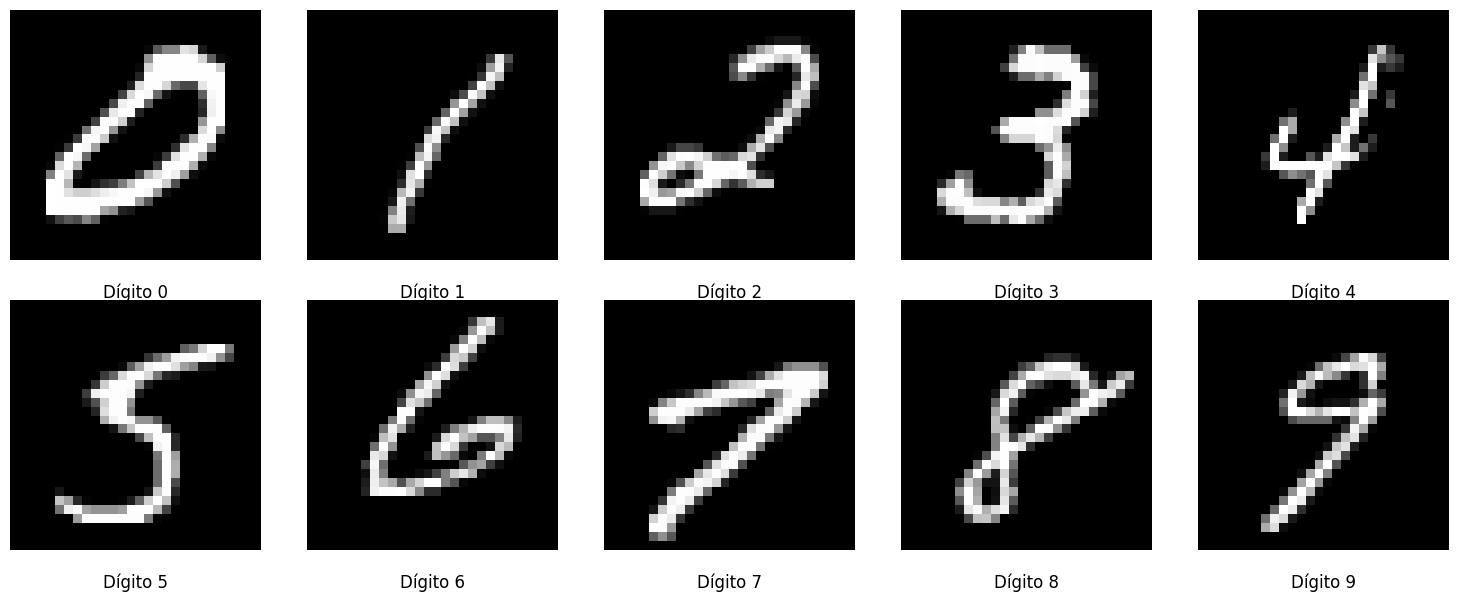

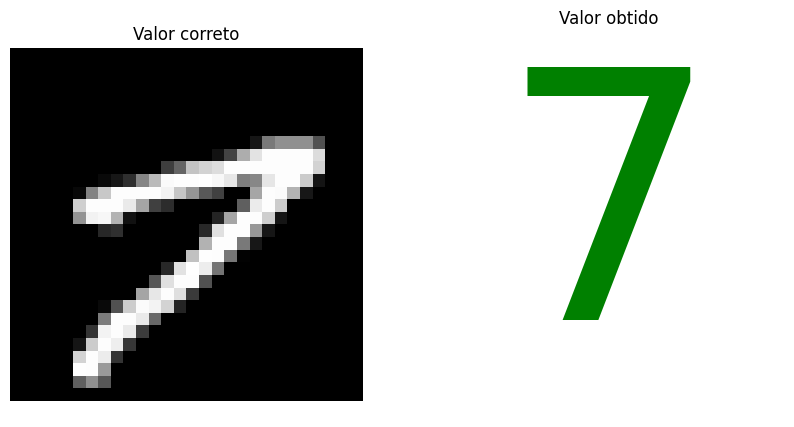

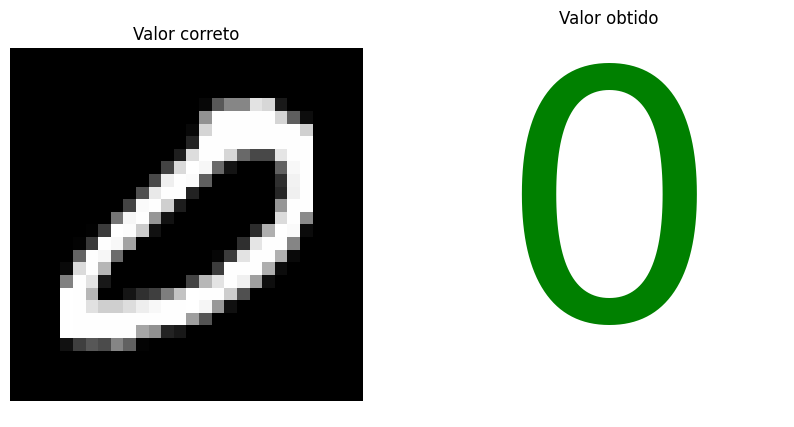

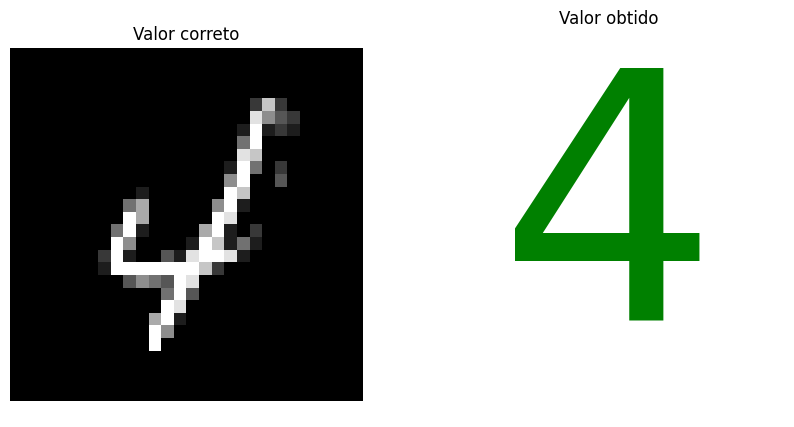

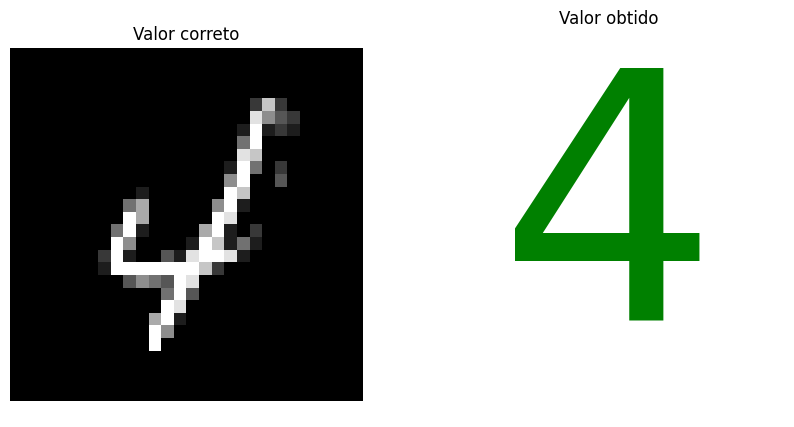

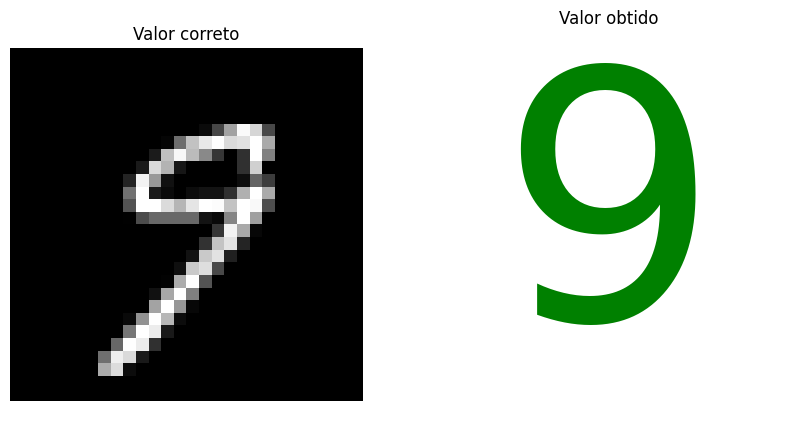

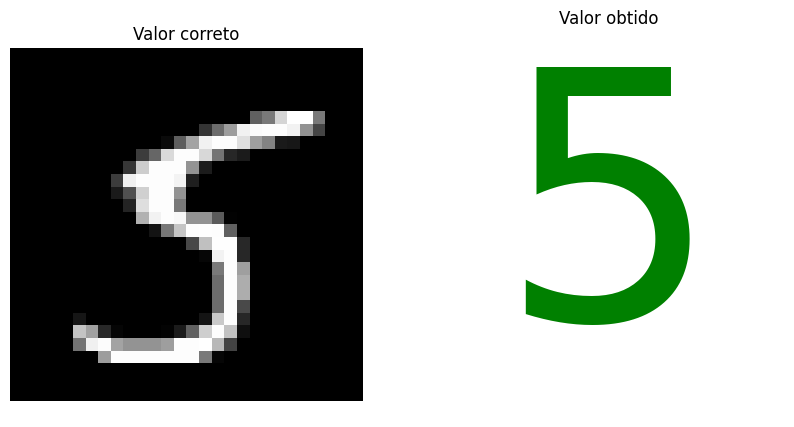

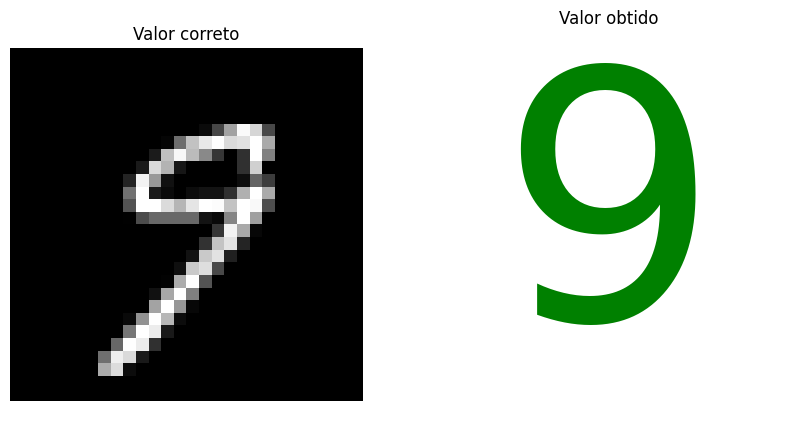

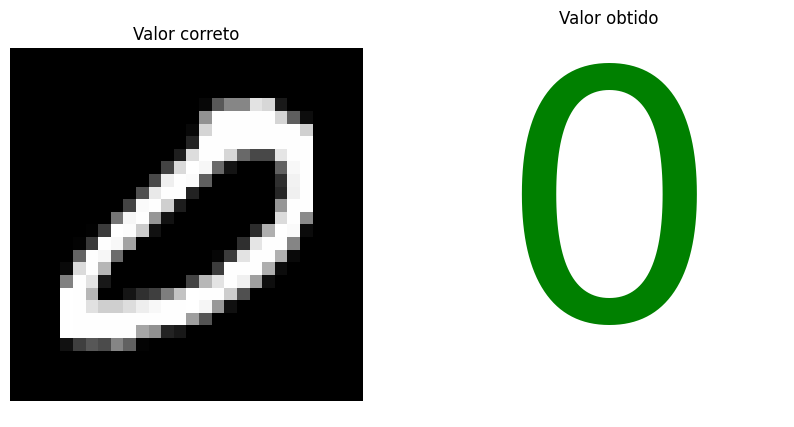

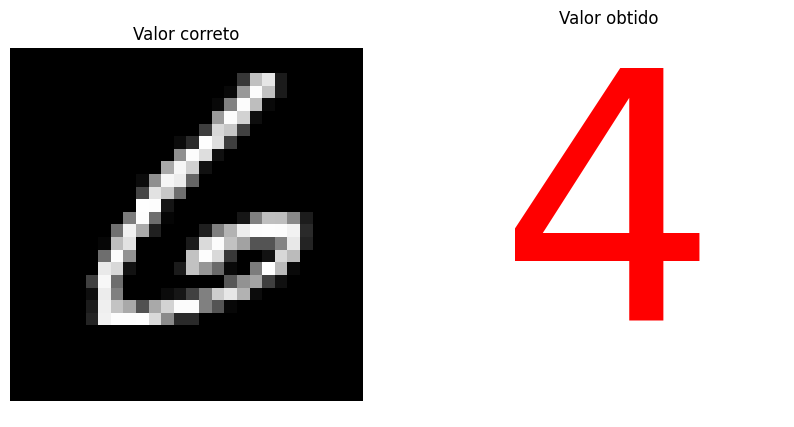

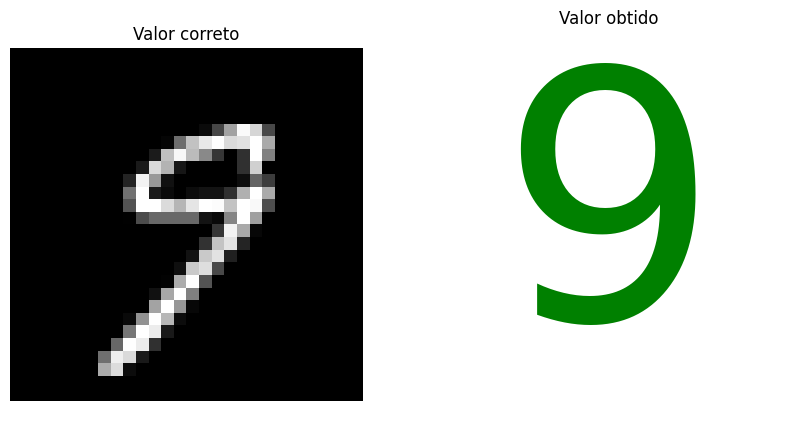

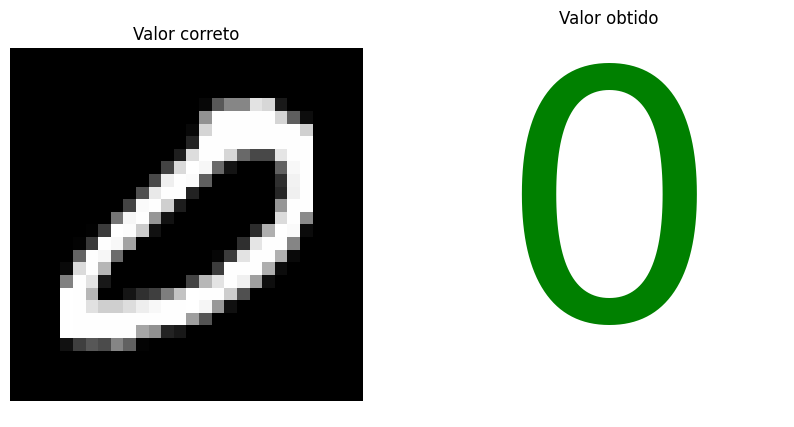

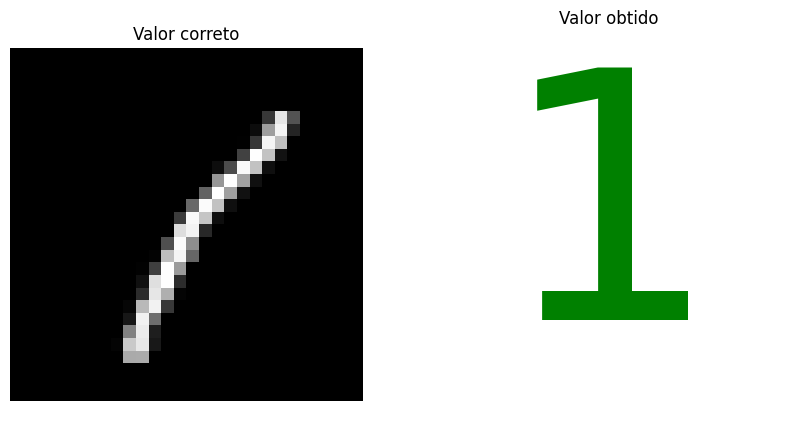

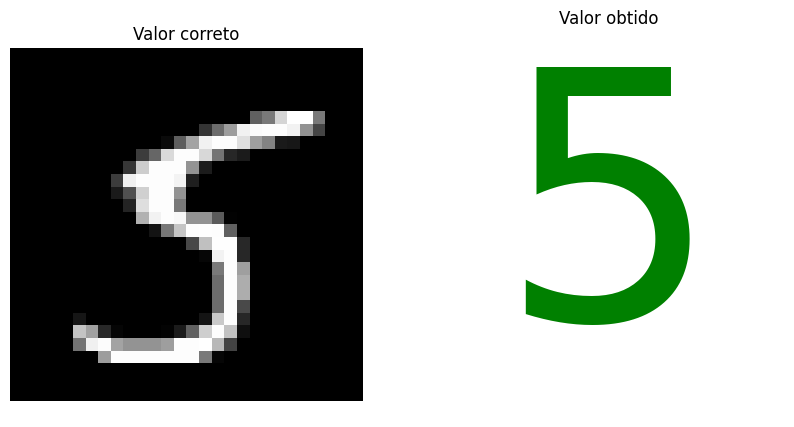

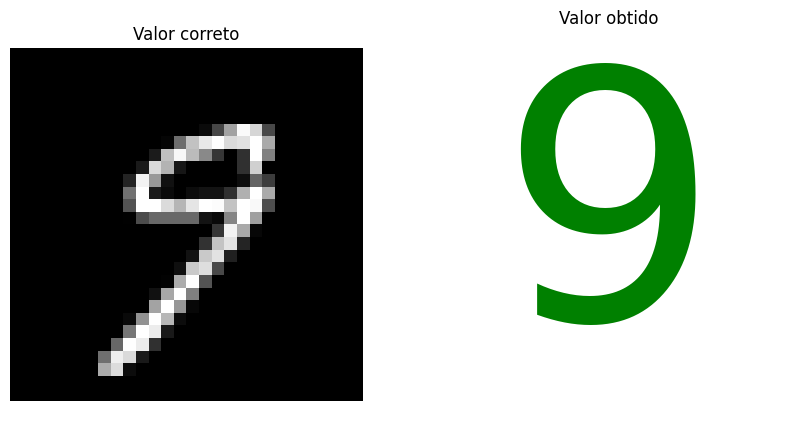

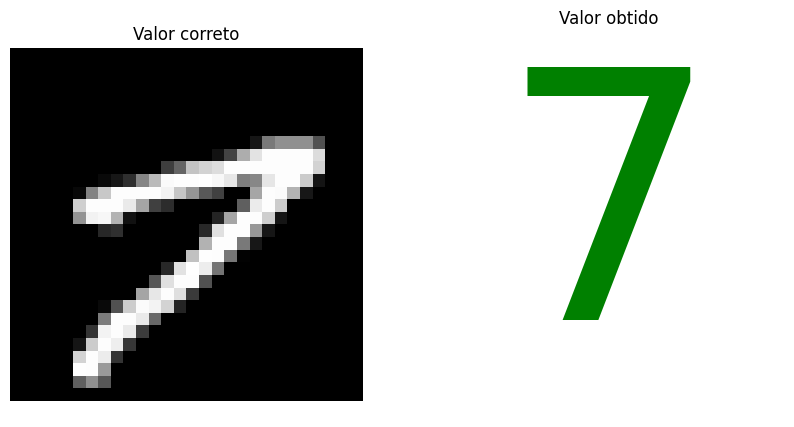

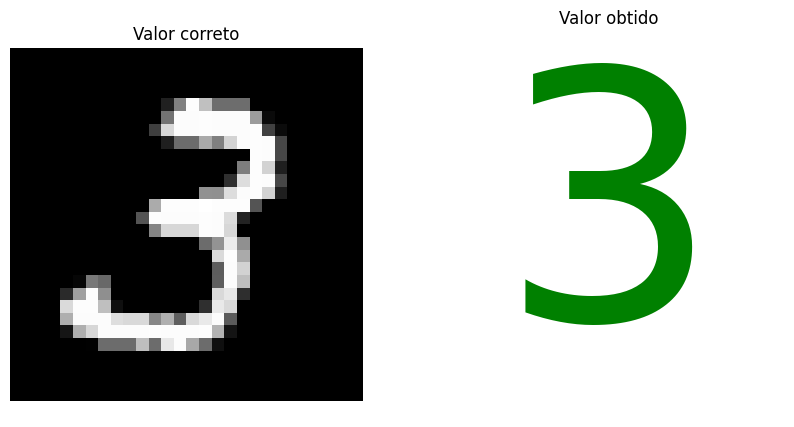

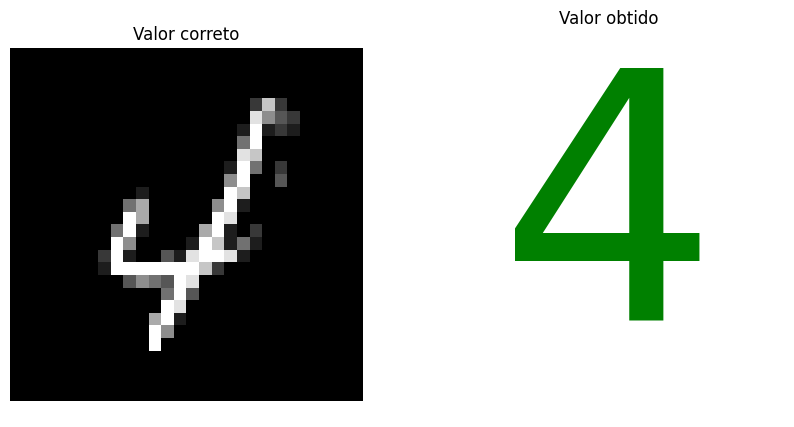

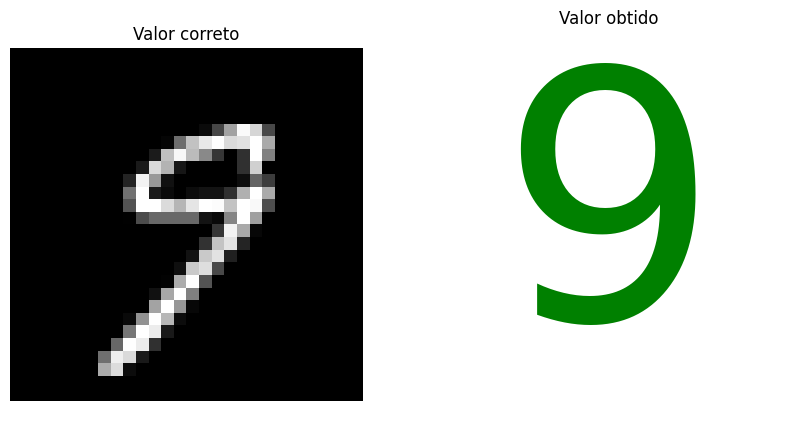

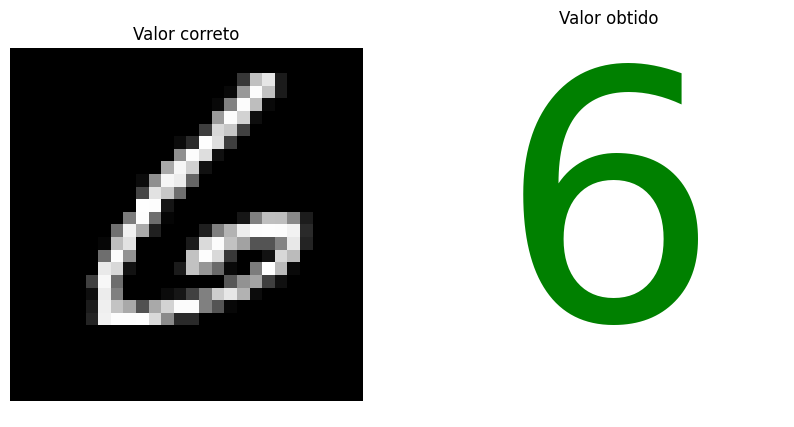

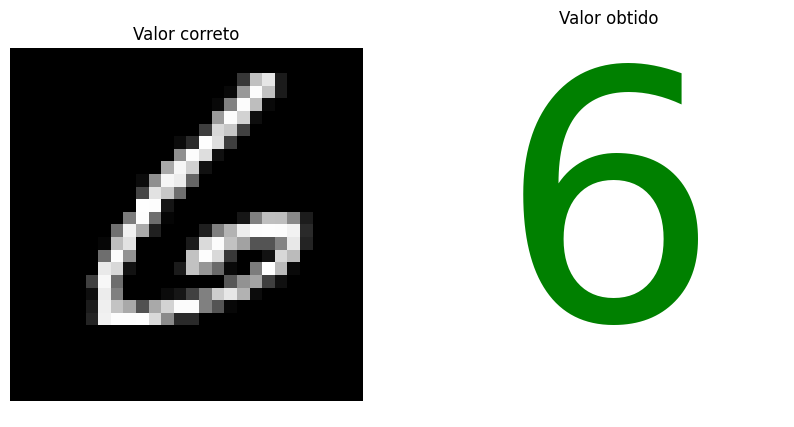

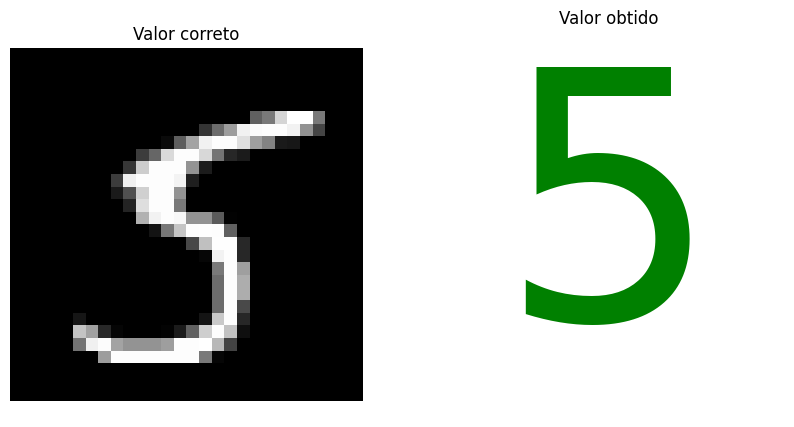

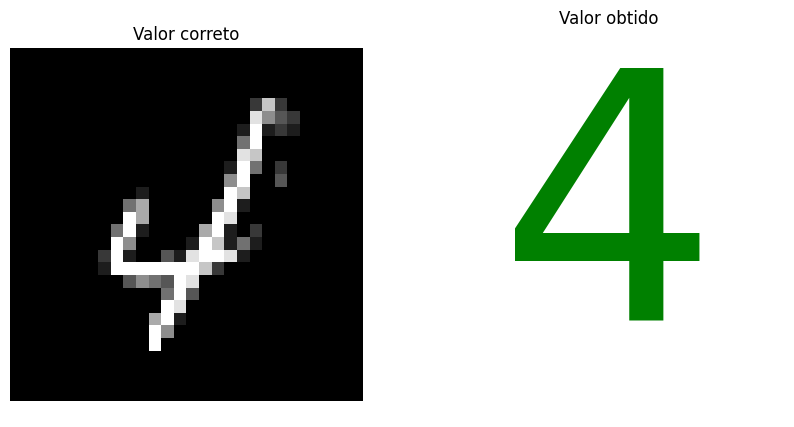

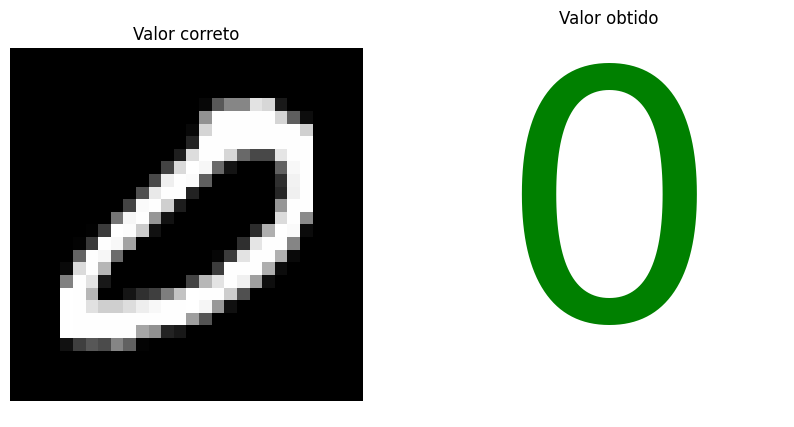

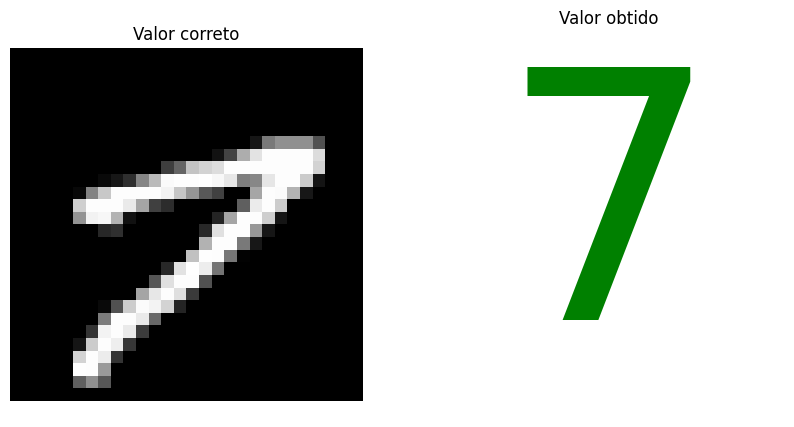

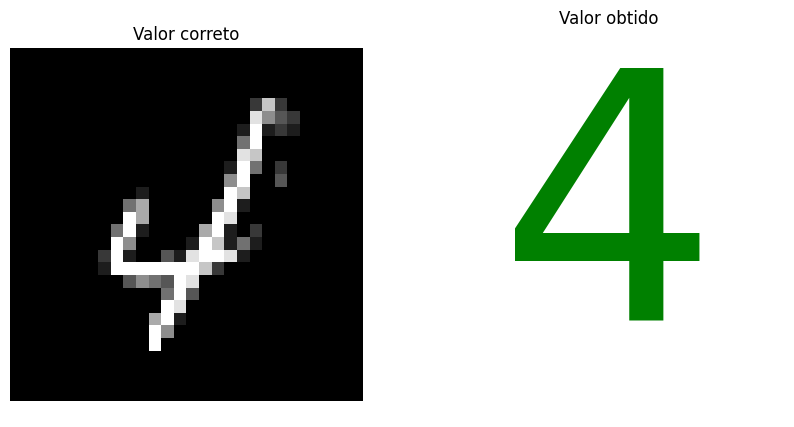

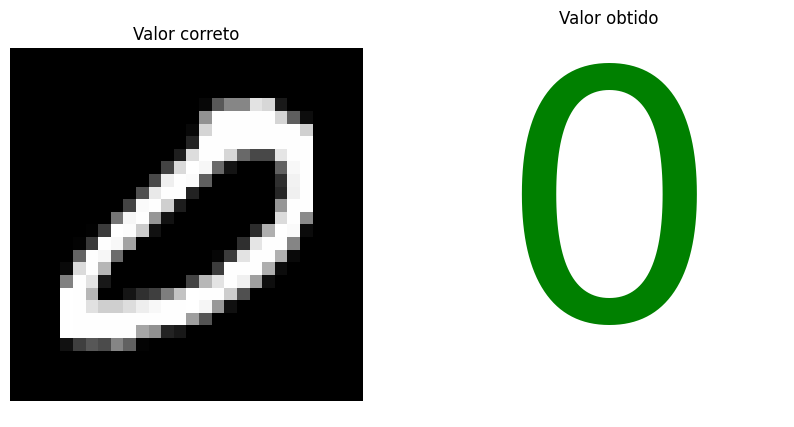

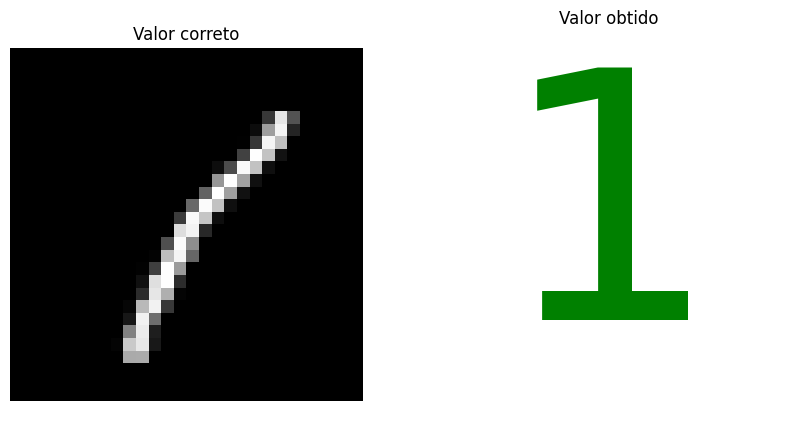

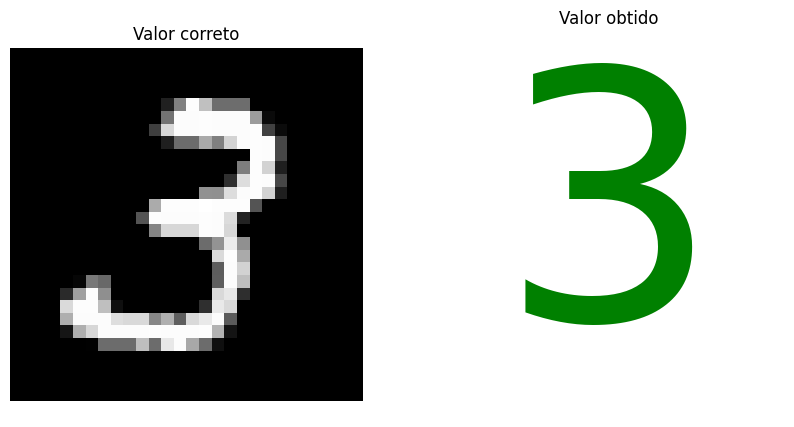

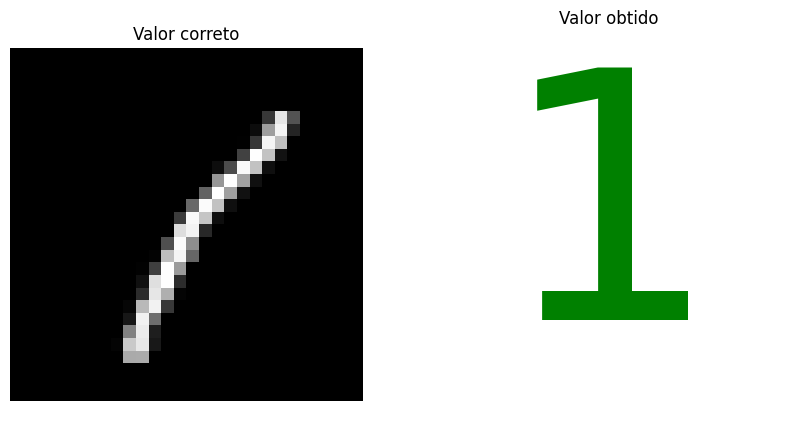

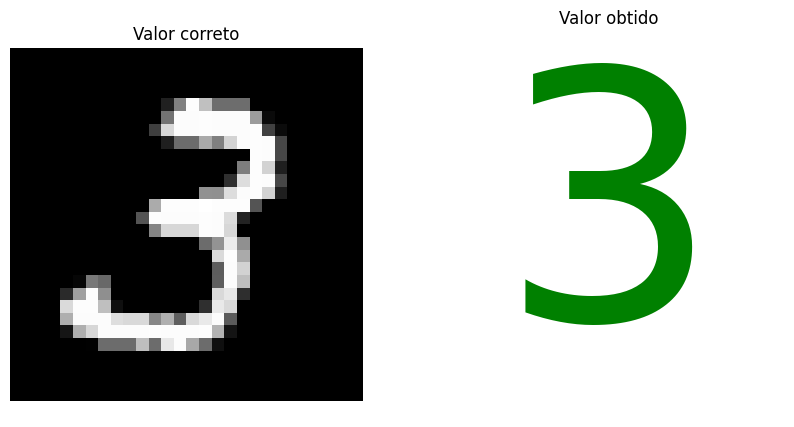

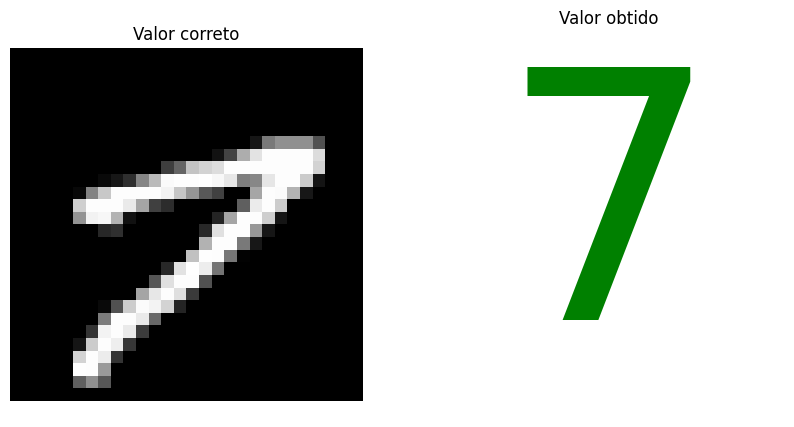

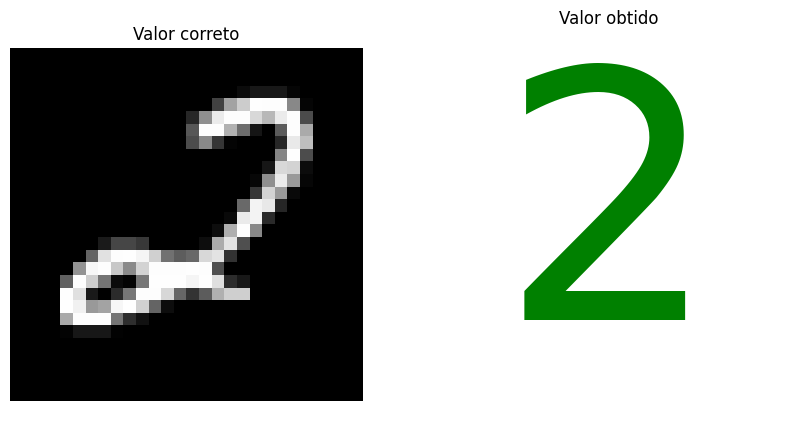

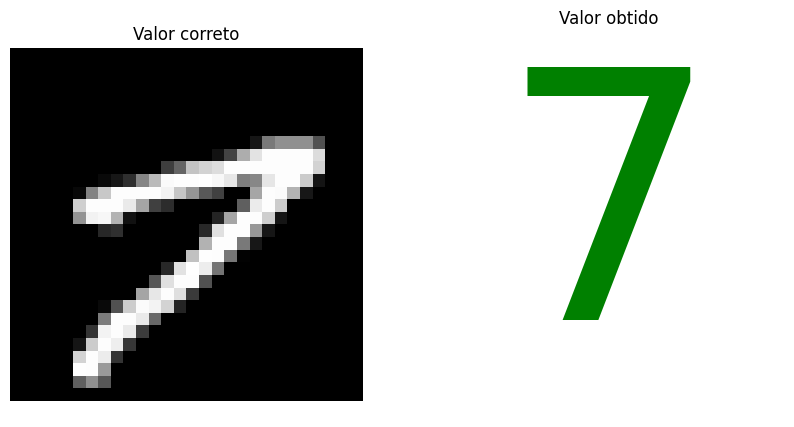

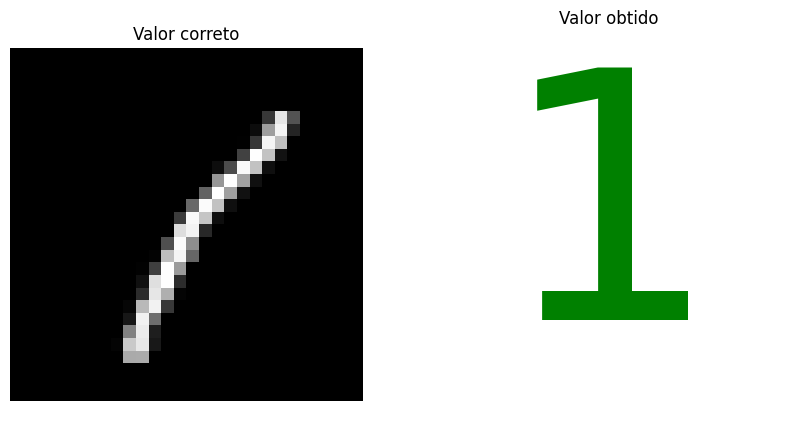

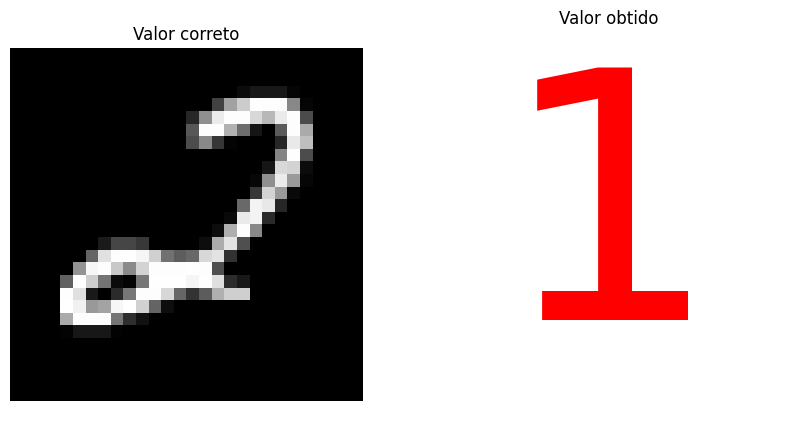

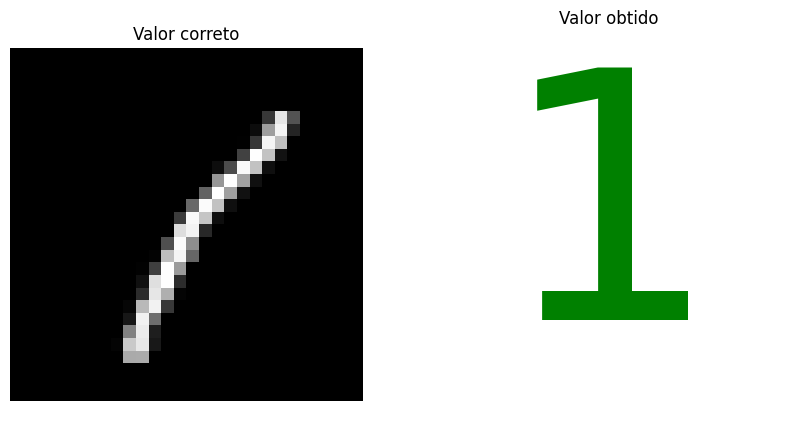

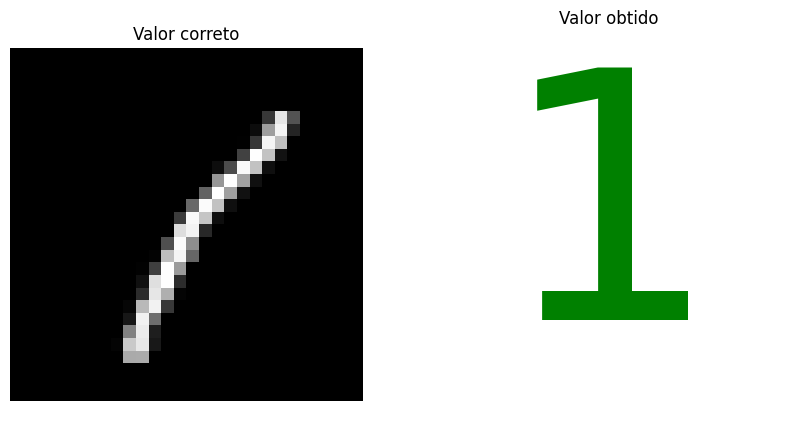

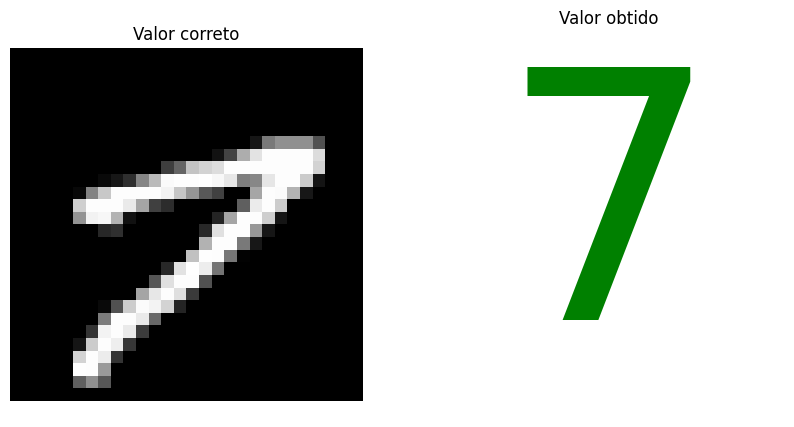

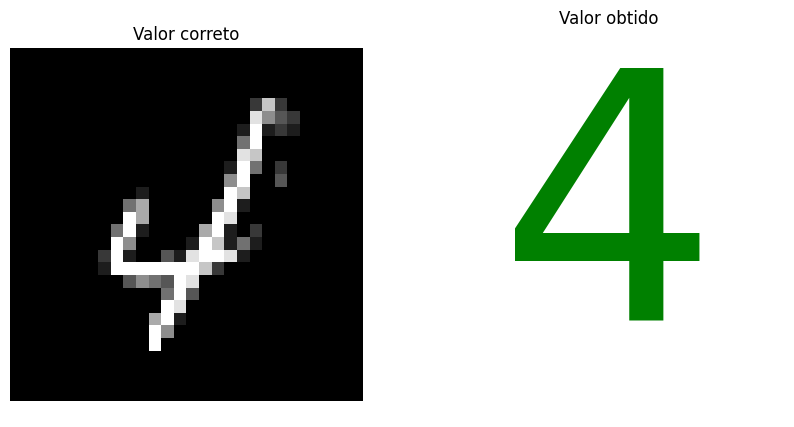

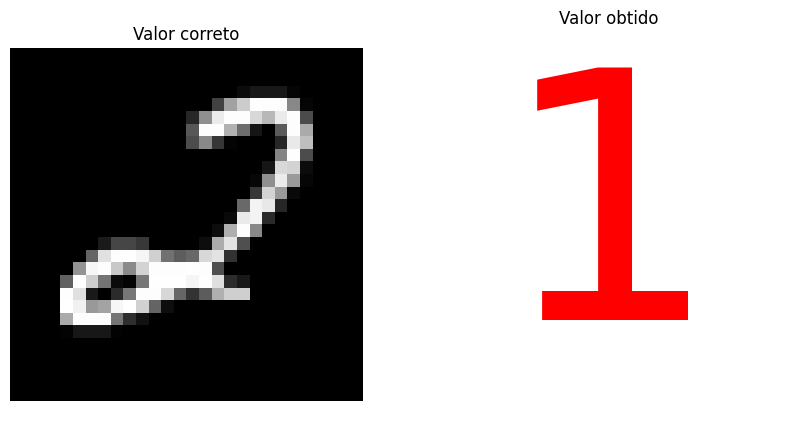

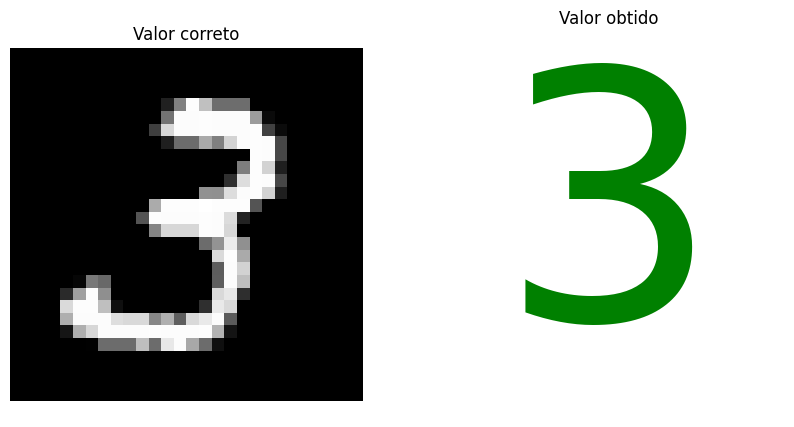

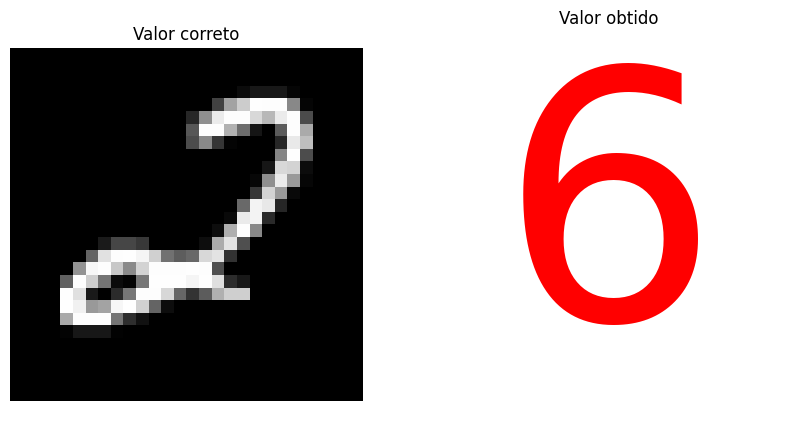

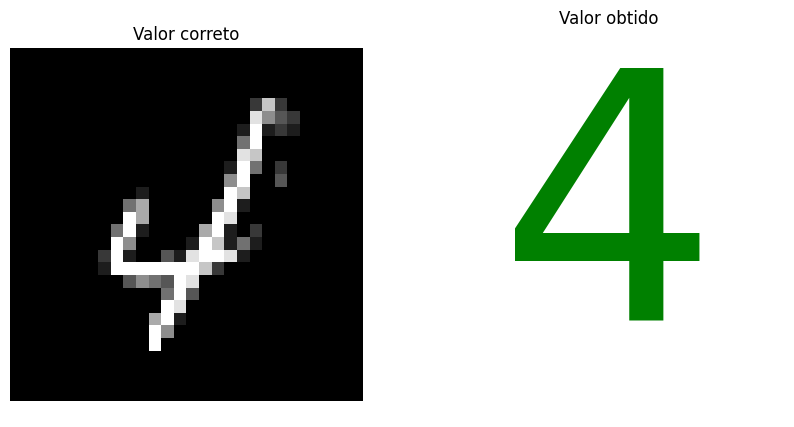

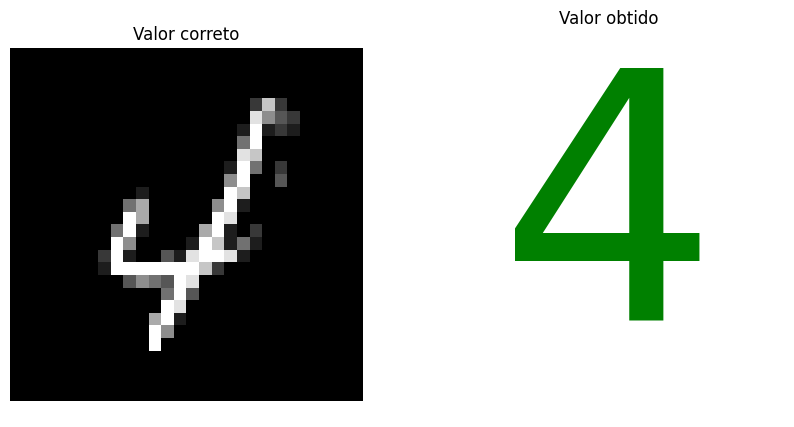

In [9]:
main()